到目前為止，我們主要關注使用NumPy訪問和操作陣列數據的工具。本節介紹與NumPy數組中的值排序相關的算法。這些算法是計算機科學

入門課程中最受歡迎的主題：如果你曾經學過這些算法，你可能已經有了關於插入排序，選擇排序，合併排序，快速排序，泡沫排序的夢想

（或者，取決於你的氣質，夢魘）還有很多很多。所有這些都是完成類似任務的方法：對列表或數組中的值進行排序。

例如，一個簡單的選擇排序重複從列表中查找最小值，並進行交換直到列表排序。我們可以在幾行Python中編寫代碼：

In [1]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [2]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

正如任何一年級計算機科學專業的學生都會告訴你的那樣，選擇排序對於它的簡單性很有用，但是對於較大的數組來說太慢了。對於$ N $值的列表

，它需要$ N $循環，每個循環都進行~N次比較來查找交換值。對於通常用於表徵這些算法的“big-O”表示法（參見Big-O表示法），選擇排序平均

值為 O(N2)：如果您將列表中的項目數加倍，執行時間將增加大約四倍。

儘管選擇排序比我最喜歡的排序算法bogosort要好得多：

In [4]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)#shuffle() 方法将序列的所有元素随机排序。可以是一个序列或者元组
    return x

In [5]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

Python有內置的排序和排序函數來處理列表，NumPy的np.sort函數對於我們的目的來說效率更高，更有用，儘管mergesort合併排序和heapsort堆積排序

也可用。對於大多數應用程序，默認快速排序綽綽有餘。

要在不修改輸入的情況下返回數組的排序版本，可以使用np.sort：

In [6]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)#要在不修改輸入的情況下返回數組的排序版本，可以使用np.sort：

array([1, 2, 3, 4, 5])

In [7]:
#如果您希望就地對數組進行排序，則可以使用數組的排序方法：
x.sort()
print(x)

[1 2 3 4 5]


In [8]:
#相關函數是argsort，它返回已排序元素的索引：
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [9]:
#NumPy排序算法的一個有用功能是能夠使用axis參數對多維數組的特定行或列進行排序。例如：
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [10]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [11]:
# sort each row of X
np.sort(X, axis=1)#請記住，這會將每個行或列視為一個獨立的數組，並且行或列值之間的任何關係都將丟失！

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

部分排序：分區

有時我們對排序整個數組不感興趣，但只想在數組中找到k個最小值。 NumPy在np.partition函數中提供了這個功能。 np.partition採用數組和數字K;

結果是一個新的數組，在分區的左邊有最小的K值，剩下的值在右邊，按任意順序：

In [12]:
x = np.array([7, 2, 3, 1, 6, 5, 4])#請注意，結果數組中的前三個值是數組中的三個最小值，其餘數組位置包含其餘值。在這兩個分區中，元素具有任意順序。
np.partition(x, 3)#np.partition取得一個陣列以及數字K,其傳回的結果就是把最小的K個值放在該分區的左側,剩下的值就在右側,順序是隨意的

array([2, 1, 3, 4, 6, 5, 7])

與排序類似，我們可以沿多維數組的任意軸進行分區：

In [13]:
np.partition(X, 2, axis=1)#結果是一個數組，其中每行中的前兩個槽包含該行中的最小值，其餘值填充剩餘的槽。

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

讓我們快速了解如何沿多個軸使用此argsort函數來查找集合中每個點的最近鄰居。我們首先在二維平面上創建一組10個隨機點。使用標準慣例，

我們將在數組中安排這些：(K-近鄰算法)

In [14]:
X = rand.rand(10, 2)#10*2的陣列

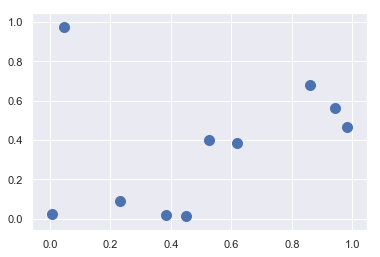

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

現在我們將計算每對點之間的距離。回想一下，兩點之間的平方距離是每個維度的平方差的總和;使用由NumPy提供的Broadcasting（計算在陣列：廣播）和聚

合（聚合：Min，Max和Everything In Between）例程，我們可以在一行代碼中計算平方距離矩陣：